## Phase 1: Clean up of EDGE data files
#### Notes: The estimates reflect the income-to- poverty ratio (IPR), which is the percentage of family income that is above or below the federal poverty threshold set for the family’s size and structure. The IPR indicator ranges from 0 to 999.1 Lower IPR values indicate a greater degree of poverty. A family with income at the poverty threshold has an IPR value of 100. The Census Bureau calculates the IPR based on money income reported for families. 

In [2]:
import pandas
pandas.__version__
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cd

/Users/dansari


In [4]:
cd /Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/EDGE

/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/EDGE


Loading in file and reading the first 5 rows

In [5]:
edge = pandas.read_csv("sch_neighborhood_poverty.csv")
edge.head()

,NCESSCH,NAME,IPR_EST,IPR_SE
0,10000500870,Albertville Middle School,245,80
1,10000500871,Albertville High School,248,80
2,10000500879,Evans Elementary School,174,91
3,10000500889,Albertville Elementary School,236,105
4,10000501616,Big Spring Lake Kindergarten School,480,120


Reviewing the datatypes and shape of the file

In [6]:
edge.dtypes

NCESSCH     int64
NAME       object
IPR_EST     int64
IPR_SE      int64
dtype: object

In [7]:
edge.shape

(100958, 4)

Adding leading zeros to Federal school ID and checking to see if change was applied accurately

In [8]:
edge['NCESSCH'] = edge['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))

In [9]:
edge['NCESSCH_length'] = edge['NCESSCH'].map(str).apply(len)

In [10]:
edge.head()

,NCESSCH,NAME,IPR_EST,IPR_SE,NCESSCH_length
0,010000500870,Albertville Middle School,245,80,12
1,010000500871,Albertville High School,248,80,12
2,010000500879,Evans Elementary School,174,91,12
3,010000500889,Albertville Elementary School,236,105,12
4,010000501616,Big Spring Lake Kindergarten School,480,120,12


In [11]:
edge.describe()

,IPR_EST,IPR_SE,NCESSCH_length
count,100958.000000,100958.000000,100958.0
mean,307.085729,72.846075,12.0
std,159.272421,38.818696,0.0
min,31.000000,0.000000,12.0
25%,199.000000,43.000000,12.0
50%,268.000000,65.000000,12.0
75%,369.000000,94.000000,12.0
max,997.000000,396.000000,12.0


Checking to make sure School ID is unique and free of duplicates

In [12]:
edge['NCESSCH'].is_unique

True

In [13]:
edge.drop(edge.columns[[4]], axis =1, inplace=True)

In [14]:
edge.rename(columns={'IPR_EST':'Income_Poverty_ratio'}, inplace=True)

In [21]:
edge.head()

,NCESSCH,NAME,Income_Poverty_ratio,IPR_SE
0,010000500870,Albertville Middle School,245,80
1,010000500871,Albertville High School,248,80
2,010000500879,Evans Elementary School,174,91
3,010000500889,Albertville Elementary School,236,105
4,010000501616,Big Spring Lake Kindergarten School,480,120


Use heatmap to determine if there are missing data

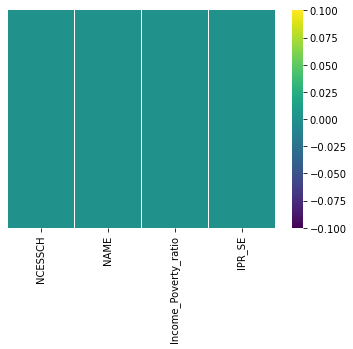

In [22]:
sns.heatmap(edge.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Checking the distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc36fa7be0>,
      dtype=object)

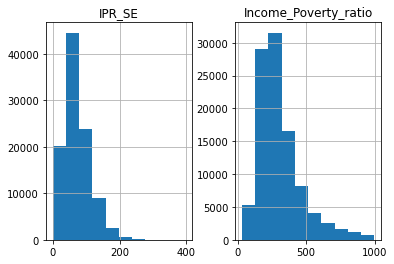

In [23]:
edge.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc35552b50>,
      dtype=object)

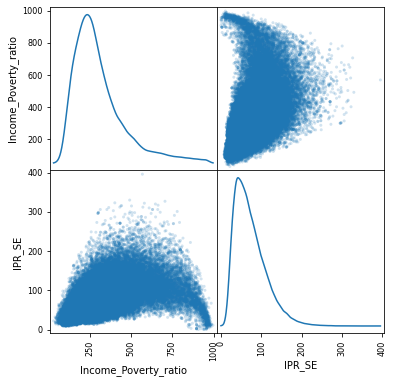

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(edge, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [25]:
edge.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/EDGE/Clean_EDGE.csv', index = False, header=True)